# Boilerplate

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
from plotnine import *
import plotnine as pn
import math
import warnings
from matplotlib import rcParams
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# Load data

In [3]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

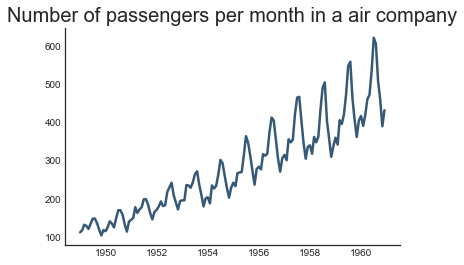

In [4]:
# Dataset
df = pd.read_csv('data/AirPassengers.csv', index_col='Month', parse_dates=True)
df = df['#Passengers']
# Visualize
plt.title('Number of passengers per month in a air company', size=20)
plt.plot(df);

# Simple example stationary first order

- https://www.youtube.com/watch?v=oY-j2Wof51c&t=18s

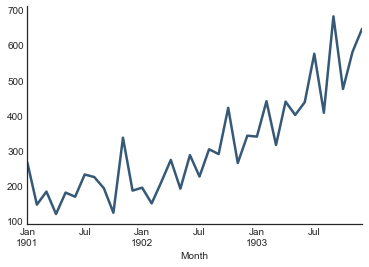

In [5]:
from pandas import read_csv
from pandas import datetime
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
shampoo = read_csv('data/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
shampoo.plot();
plt.show();

In [11]:
# diferenca entre dois valores da serie temporal (lag difference)
def difference(dataset:pd.Series, interval=1) -> pd.Series:
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [12]:
z = difference(shampoo, interval = 1)

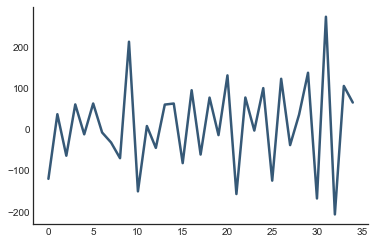

In [8]:
plt.plot(z);

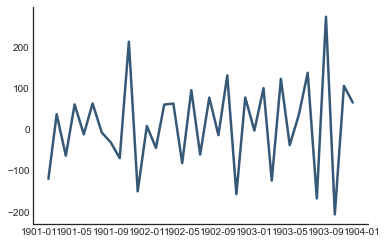

In [9]:
# pandas method
plt.plot(shampoo.diff(1))

## Coming back to autocorrelation
https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f

In [10]:
passengers = df
dfpassengers = pd.DataFrame(passengers)

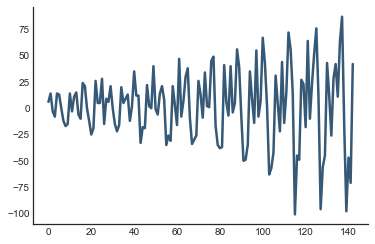

In [13]:
# aqui as oscilacoes nao estao constantes
plt.plot(difference(passengers,1));

In [14]:
def diffdf(df:"pd.DataFrame", var:str, interval:int = 1) -> "pd.DataFrame":
    '''
    Takes a dataframe with a var column which is a time series and returns new dataframe
    with a new variable which results from the difference of time t and time t minus interval
    '''
    # internal func
    series = df[var]

    diff = list()
    for i in range(interval, len(series)):
        value = series[i] - series[i - interval]
        diff.append(value)

    diff = pd.Series(diff)

    # new dataframe with only relevant rows to plot
    newdf = df[interval:]

    # final dataframea
    newdf[f'diff_{interval}'] = diff.values

    newdf

    return newdf

In [15]:
dfnew = diffdf(dfpassengers, '#Passengers')

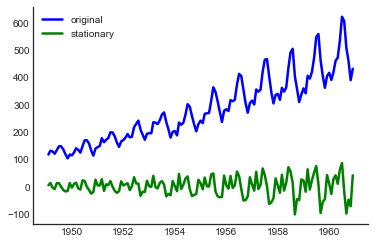

In [16]:
plt.plot(dfnew['#Passengers'], color = 'blue', label = 'original');
plt.plot(dfnew['diff_1'], color = 'green', label = 'stationary');
plt.legend();
plt.show();

## Manual autocorrelation
- Correlação entre t e t minus 1

In [17]:
np.corrcoef(dfnew['#Passengers'],dfnew['diff_1'])[0][1]

0.1365045078219961

In [18]:
# def myacf(df:"pd.DataFrame", var1:str, laginit:int, laginterval:int):
#     acfs = list()
#     lags = list()
#     for lag in range(laginit, df.shape[0],laginterval):
#         # first lag var
#         newdf = diffdf(df, var = var1, interval = lag)
#         lags.append(lag)
#         lastvar = newdf.columns[-1]
#         acfs.append(np.corrcoef(newdf[var1],newdf[lastvar])[0][1])
        
#     return pd.DataFrame({'lag':lags[:-laginit],'acf':acfs[:-laginit]})

## acf do statsmodels

In [19]:
acf_stat = acf(passengers)

In [20]:
acf_stat

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

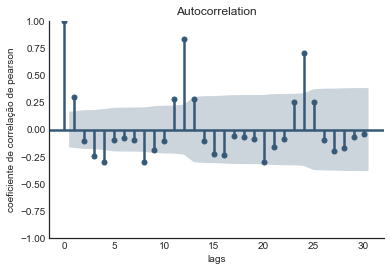

In [21]:
# Plot autocorrelation
plot_acf(dfnew['diff_1'], lags=30);
plt.xlabel('lags');
plt.ylabel('coeficiente de correlação de pearson');
plt.show();

## Partial autocorrelation
https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f


This one is a bit tougher to understand. It does the same as regular autocorrelation — shows the correlation of a sequence with itself lagged by some number of time units. But there’s a twist. Only the direct effect is shown, and all intermediary effects are removed.


For example, you want to know the direct relationship between the number of passengers today and 12 months ago. You don’t care about anything in between.

In [22]:
# Calculate partial autocorrelation
pacf_values = pacf(dfnew['diff_1'])

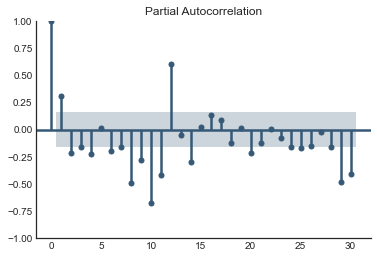

In [23]:
# Plot partial autocorrelation
plot_pacf(dfnew['diff_1'], lags=30);